In [1]:
import tensorflow as tf         
import numpy as np         
import pandas as pd

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train=x_train.reshape(-1,28,28,1).astype('float32')
x_test=x_test.reshape(-1,28,28,1).astype('float32')
x_train/=255
x_test/=255
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
model=tf.keras.models.Sequential()

In [9]:
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10,activation='softmax'))

/Users/devanshgoyal/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=[x_test,y_test])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7612 - loss: 0.6682 - val_accuracy: 0.8750 - val_loss: 0.3591
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8804 - loss: 0.3333 - val_accuracy: 0.8862 - val_loss: 0.3262
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8967 - loss: 0.2865 - val_accuracy: 0.8951 - val_loss: 0.2960
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9052 - loss: 0.2599 - val_accuracy: 0.8994 - val_loss: 0.2800
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9187 - loss: 0.2265 - val_accuracy: 0.8991 - val_loss: 0.2720
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9203 - loss: 0.2146 - val_accuracy: 0.8963 - val_loss: 0.2761
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9258 - loss: 0.2020 - val_accuracy: 0.9076 - val_loss: 0.2604
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9306 - loss: 0

In [13]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
y_pred=model.predict(x_test)
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)
ac=accuracy_score(y_pred_class,y_test_class)
f=f1_score(y_pred_class,y_test_class,average='macro')
cr=classification_report(y_pred_class,y_test_class)
cm=confusion_matrix(y_pred_class,y_test_class)
print(ac)
print(f)
print(cr)
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.9033
0.9035495198038183
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       958
           1       0.98      0.98      0.98      1003
           2       0.85      0.85      0.85       992
           3       0.90      0.91      0.91       986
           4       0.87      0.83      0.85      1044
           5       0.97      0.99      0.98       980
           6       0.74      0.72      0.73      1025
           7       0.99      0.93      0.96      1064
           8       0.97      0.98      0.98       988
           9       0.94      0.98      0.96       960

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

[[828   2   9   9   0   0 106   0   3   1]
 [  4 984   1   8   3   0   2   0   1   0]
 [ 28   1 846  15  46   0  52   0   4   0]
 [ 22  10   6 901  15   1  28   0   3   0]
 [

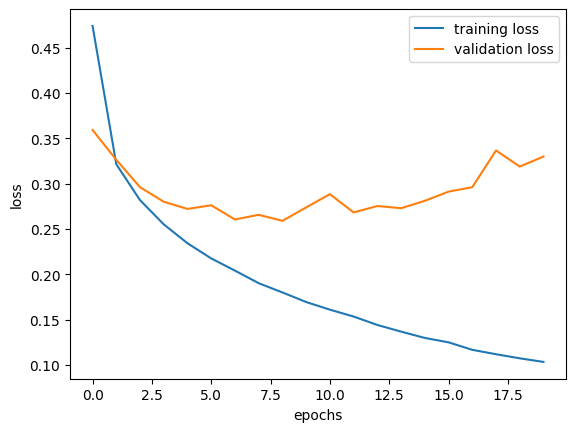

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

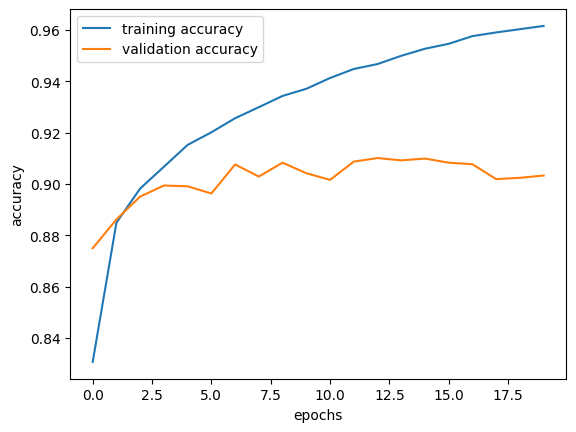

In [15]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[9.9961001e-01 1.3256683e-11 2.8273204e-04 1.8839240e-06 5.1893629e-08
  2.5140988e-18 1.0541344e-04 6.4351979e-27 3.4203329e-10 1.6983667e-13]]
predicted class:  [0]


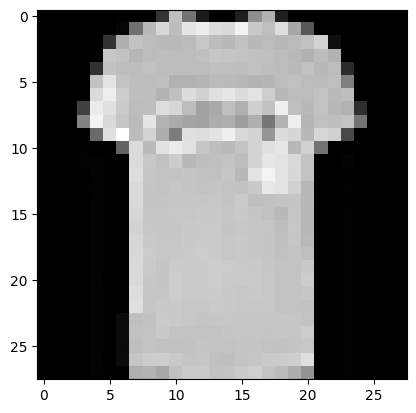

In [21]:
from PIL import Image
img_path='/Users/devanshgoyal/DLLABEXAM/19.png'
img=Image.open(img_path).convert('L')
plt.imshow(img,cmap='gray')
img=img.resize((28,28))
img_array=np.array(img)
img_array=img_array.reshape(-1,28,28,1).astype('float32')
img_array/=255
pred=model.predict(img_array)
print(pred)
pred_class=np.argmax(pred,axis=1)
print("predicted class: ",pred_class)